Задание 1:
Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная:

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [1]:
import numpy as np

In [23]:
# диагональная, ортогональная, но не единичная(!)

a = np.array([[0.96, -0.28],
              [0.28, 0.96]])

In [24]:
a @ a.T

array([[1.00, 0.00],
       [0.00, 1.00]])

In [9]:
# b) верхнетреугольная, ортогональная:

b = np.array([[2.236, 5.3665],
              [0, 1.17888]])

In [11]:
# c) нижнетреугольная, ортогональная:

c = np.array([[1, 0, -2],
              [0, 1, ],
             [0, 0, 1]])

In [54]:
# d) матрица, у которой определитель = 1, и все элементы не равны 0:

d = np.array([[6, 5],
              [1, 1]])

In [55]:
np.linalg.det(d)

1.0000000000000002

In [57]:
# e) матрица (3x3), у которой определитель = 1:

e = np.array([[1, 0, 0],
              [2, 1, 0], 
              [2, 3, 1]])

In [58]:
np.linalg.det(e)

1.0

Задание 2:  
Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [60]:
m = np.array([[2, 2],
              [1, 3]])

In [65]:
n, v = np.linalg.eig(m)
print(f'Собственное значение: {n}')
print(f'Собственные векторы: {v}')

Собственное значение: [1. 4.]
Собственные векторы: [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [66]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])

In [67]:
n, v = np.linalg.eig(m)
print(f'Собственное значение: {n}')
print(f'Собственные векторы: {v}')

Собственное значение: [3. 6. 3.]
Собственные векторы: [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]


Задание 3:  
Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [130]:
m = np.array([[1, 2],
              [2,3]])

In [131]:
n, v = np.linalg.eig(m)
print(v)

[[-0.85 -0.53]
 [0.53 -0.85]]


In [112]:
print(v * np.diag(n) * v.T)

[[-0.17 -0.00]
 [-0.00 3.07]]


Задание 4:  
Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [9]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [10]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [11]:
X, y = load_digits(return_X_y=True)

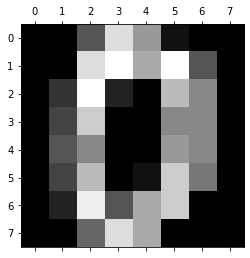

In [12]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

In [14]:
svd = TruncatedSVD(n_components=5)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.5152668955478386

In [15]:
a = list(range(1, 20))
b = []
for i in range(1, 20):
    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    b.append(rf_reduced.oob_score_)

Text(0, 0.5, 'oob_score')

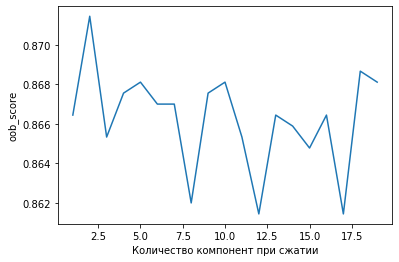

In [17]:
plt.plot(a,b)
plt.xlabel('Количество компонент при сжатии')
plt.ylabel('oob_score')